In [3]:
import glob
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [4]:
data = pd.read_csv("tennis_full_data.csv")

In [5]:
data

,surface,tourney_date,player_one,player_two,player_one_ht,player_two_ht,player_one_age,player_two_age,player_one_hand,player_two_hand,...,player_two_break_point_saved,player_one_break_point_faced,player_two_break_point_faced,player_one_rank,player_two_rank,player_one_rank_points,player_two_rank_points,FTR,player_one_win_percentage,player_two_win_percentage
0,Hard,2010-01-03,Andy Roddick,Peter Luczak,188.0,183.0,27.348392,30.346338,R,R,...,3.0,3.0,5.0,7.0,77.0,4410.0,598.0,W,85.714286,85.294118
1,Hard,2010-01-03,Carsten Ball,Mischa Zverev,198.0,190.0,22.543463,22.370979,L,L,...,7.0,0.0,10.0,134.0,78.0,400.0,590.0,W,76.666667,64.705882
2,Hard,2010-01-03,Jarkko Nieminen,Richard Gasquet,185.0,185.0,28.451745,23.548255,L,R,...,5.0,11.0,8.0,88.0,52.0,568.0,850.0,L,65.517241,64.705882
3,Hard,2010-01-03,Jurgen Melzer,Matthew Ebden,183.0,188.0,28.621492,22.108145,L,R,...,3.0,5.0,3.0,28.0,285.0,1260.0,151.0,L,55.172414,85.714286
4,Hard,2010-01-03,Nick Lindahl,Tomas Berdych,183.0,196.0,21.429158,24.298426,R,R,...,1.0,9.0,1.0,251.0,20.0,179.0,1655.0,L,63.414634,88.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28432,Hard,2022-03-04,Casper Ruud,Mikhail Kukushkin,183.0,183.0,23.186858,34.176591,R,R,...,2.0,1.0,5.0,8.0,160.0,3915.0,386.0,W,77.419355,58.823529
28433,Hard,2022-03-04,Alexander Bublik,Viktor Durasovic,196.0,185.0,24.700890,24.947296,R,R,...,1.0,0.0,4.0,32.0,321.0,1416.0,143.0,W,100.000000,78.260870
28434,Hard,2022-03-04,Alexander Bublik,Casper Ruud,196.0,183.0,24.700890,23.186858,R,R,...,2.0,5.0,4.0,32.0,8.0,1416.0,3915.0,W,86.206897,76.470588
28435,Hard,2022-03-04,Elias Ymer,Taro Daniel,183.0,191.0,25.886379,29.086927,R,R,...,5.0,10.0,8.0,133.0,101.0,496.0,660.0,W,76.000000,70.270270


In [6]:
q1 = data["player_one_age"].quantile(0.25)
q3 = data["player_one_age"].quantile(0.75)
iqr = q3 - q1
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr

In [7]:
data[(data["player_one_age"] < low) | (data["player_one_age"] > up)]

,surface,tourney_date,player_one,player_two,player_one_ht,player_two_ht,player_one_age,player_two_age,player_one_hand,player_two_hand,...,player_two_break_point_saved,player_one_break_point_faced,player_two_break_point_faced,player_one_rank,player_two_rank,player_one_rank_points,player_two_rank_points,FTR,player_one_win_percentage,player_two_win_percentage
20654,Hard,2018-02-12,Ivo Karlovic,Ryan Harrison,208.0,183.0,38.956879,25.768652,R,R,...,2.0,1.0,4.0,89.0,44.0,635.0,1105.0,W,82.500000,77.777778
20659,Hard,2018-02-12,Ivo Karlovic,Sam Querrey,208.0,198.0,38.956879,30.351814,R,R,...,0.0,2.0,0.0,89.0,12.0,635.0,2490.0,L,80.769231,92.307692
20929,Hard,2018-03-19,Ivo Karlovic,Vasek Pospisil,208.0,193.0,39.052704,27.737166,R,R,...,1.0,3.0,2.0,79.0,77.0,680.0,687.0,L,92.500000,81.481481
21044,Clay,2018-04-09,Ivo Karlovic,Taro Daniel,208.0,191.0,39.110198,25.196441,R,R,...,1.0,1.0,2.0,88.0,111.0,645.0,513.0,W,82.608696,73.913043
21057,Clay,2018-04-09,Ivo Karlovic,Nick Kyrgios,208.0,193.0,39.110198,22.951403,R,R,...,5.0,4.0,8.0,88.0,24.0,645.0,1675.0,W,84.090909,61.818182
21060,Clay,2018-04-09,Ivo Karlovic,Tennys Sandgren,208.0,188.0,39.110198,26.715948,R,R,...,3.0,5.0,5.0,88.0,56.0,645.0,898.0,L,82.926829,84.000000
21142,Clay,2018-04-23,Ivo Karlovic,Tommy Robredo,208.0,180.0,39.148528,35.978097,R,R,...,1.0,0.0,2.0,75.0,211.0,715.0,271.0,W,89.230769,88.059701
21155,Clay,2018-04-23,Ivo Karlovic,Roberto Bautista Agut,208.0,183.0,39.148528,30.023272,R,R,...,1.0,10.0,1.0,75.0,15.0,715.0,2175.0,L,77.419355,90.384615
21246,Clay,2018-04-30,Ivo Karlovic,Philipp Kohlschreiber,208.0,178.0,39.167693,34.537988,R,R,...,0.0,6.0,0.0,82.0,34.0,690.0,1320.0,L,76.470588,82.500000
21374,Clay,2018-05-21,Ivo Karlovic,Peter Gojowczyk,208.0,185.0,39.225188,28.848734,R,R,...,1.0,1.0,2.0,93.0,49.0,665.0,1045.0,L,86.153846,86.153846


In [8]:
# lets find the index of the outliers
data[(data["player_one_age"] < low) | (data["player_one_age"] > up)].index

Int64Index([20654, 20659, 20929, 21044, 21057, 21060, 21142, 21155, 21246,
            21374, 21521, 21666, 21716, 22726, 22848, 22938, 23002, 23046,
            23233, 23335, 23359, 23756, 24363, 24767, 25162, 25345, 25601,
            25609, 25674, 25679, 26012, 26026, 26124, 26154, 26181, 26473,
            26719, 26804, 26954, 26972, 26978, 27082, 27520, 27583, 27655,
            27741, 27768, 27901, 27993, 28146, 28304, 28382],
           dtype='int64')

In [9]:
data[(data["player_one_age"] > up) | (data["player_one_age"] < low)].any(axis=None)

True

In [10]:
# Lets add functionalty

#q1 = data["player_one_age"].quantile(0.25)
#q3 = data["player_one_age"].quantile(0.75)
#iqr = q3 - q1
#up = q3 + 1.5 * iqr
#low = q1 - 1.5 * iqr

def outlier(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

print(outlier(data, "player_one_age"))
print(outlier(data, "player_two_age"))
print(outlier(data, "player_two_ace"))

(15.466119096499996, 38.9459274469)
(16.565366187550005, 39.114305270349995)
(-8.5, 19.5)


In [11]:
# Lets add check outlier function for further needs (Return Boolean)
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    
print(check_outlier(data, "player_one_age"))
print(check_outlier(data, "player_two_age"))
print(check_outlier(data, "player_two_ace"))

True
True
True


In [12]:
data["surface"].unique()

array(['Hard', 'Clay', 'Grass', 'Carpet'], dtype=object)

In [13]:
def get_columns(dataframe, cat_threshold=10, card_threshold=20):
    # Categorical columns
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    num_but_cat_cols = [col for col in dataframe.columns if dataframe[col].nunique() < cat_threshold and 
                        dataframe[col].dtype != "O"]
    cat_but_card_cols = [col for col in dataframe.columns if dataframe[col].nunique() > card_threshold and
                         dataframe[col].dtype == "O"]
    cat_cols = cat_cols + num_but_cat_cols
    cat_cols = [col for col in cat_cols if col not in cat_but_card_cols]

    # Numerical columns
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat_cols]

    # Print some summary information
    print(f"Number of observations: {dataframe.shape[0]}")
    print(f"Number of variables: {dataframe.shape[1]}")
    print(f"Number of categorical columns: {len(cat_cols)}")
    print(f"Number of numerical columns: {len(num_cols)}")
    print(f"Number of categorical columns with high cardinality: {len(cat_but_card_cols)}")
    print(f"Number of numerical columns treated as categorical: {len(num_but_cat_cols)}")

    return cat_cols, num_cols, cat_but_card_cols


cat_cols, num_cols, cat_but_card_cols = get_columns(data)

Number of observations: 28437
Number of variables: 25
Number of categorical columns: 4
Number of numerical columns: 18
Number of categorical columns with high cardinality: 3
Number of numerical columns treated as categorical: 0


In [14]:
for col in num_cols:
    print(col, check_outlier(data, col))

player_one_ht True
player_two_ht True
player_one_age True
player_two_age True
player_one_ace True
player_two_ace True
player_one_df True
player_two_df True
player_one_break_point_saved True
player_two_break_point_saved True
player_one_break_point_faced True
player_two_break_point_faced True
player_one_rank True
player_two_rank True
player_one_rank_points True
player_two_rank_points True
player_one_win_percentage True
player_two_win_percentage True


In [15]:
def detect_outliers(dataframe, col_name, return_index=False):
    low, up = outlier(dataframe, col_name)
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if return_index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index


In [16]:
detect_outliers(data, "player_one_age", True)

      surface tourney_date    player_one      player_two  player_one_ht  \
20654    Hard   2018-02-12  Ivo Karlovic   Ryan Harrison          208.0   
20659    Hard   2018-02-12  Ivo Karlovic     Sam Querrey          208.0   
20929    Hard   2018-03-19  Ivo Karlovic  Vasek Pospisil          208.0   
21044    Clay   2018-04-09  Ivo Karlovic     Taro Daniel          208.0   
21057    Clay   2018-04-09  Ivo Karlovic    Nick Kyrgios          208.0   

       player_two_ht  player_one_age  player_two_age player_one_hand  \
20654          183.0       38.956879       25.768652               R   
20659          198.0       38.956879       30.351814               R   
20929          193.0       39.052704       27.737166               R   
21044          191.0       39.110198       25.196441               R   
21057          193.0       39.110198       22.951403               R   

      player_two_hand  ...  player_two_break_point_saved  \
20654               R  ...                           2.0

Int64Index([20654, 20659, 20929, 21044, 21057, 21060, 21142, 21155, 21246,
            21374, 21521, 21666, 21716, 22726, 22848, 22938, 23002, 23046,
            23233, 23335, 23359, 23756, 24363, 24767, 25162, 25345, 25601,
            25609, 25674, 25679, 26012, 26026, 26124, 26154, 26181, 26473,
            26719, 26804, 26954, 26972, 26978, 27082, 27520, 27583, 27655,
            27741, 27768, 27901, 27993, 28146, 28304, 28382],
           dtype='int64')

<AxesSubplot:xlabel='player_two_ht'>

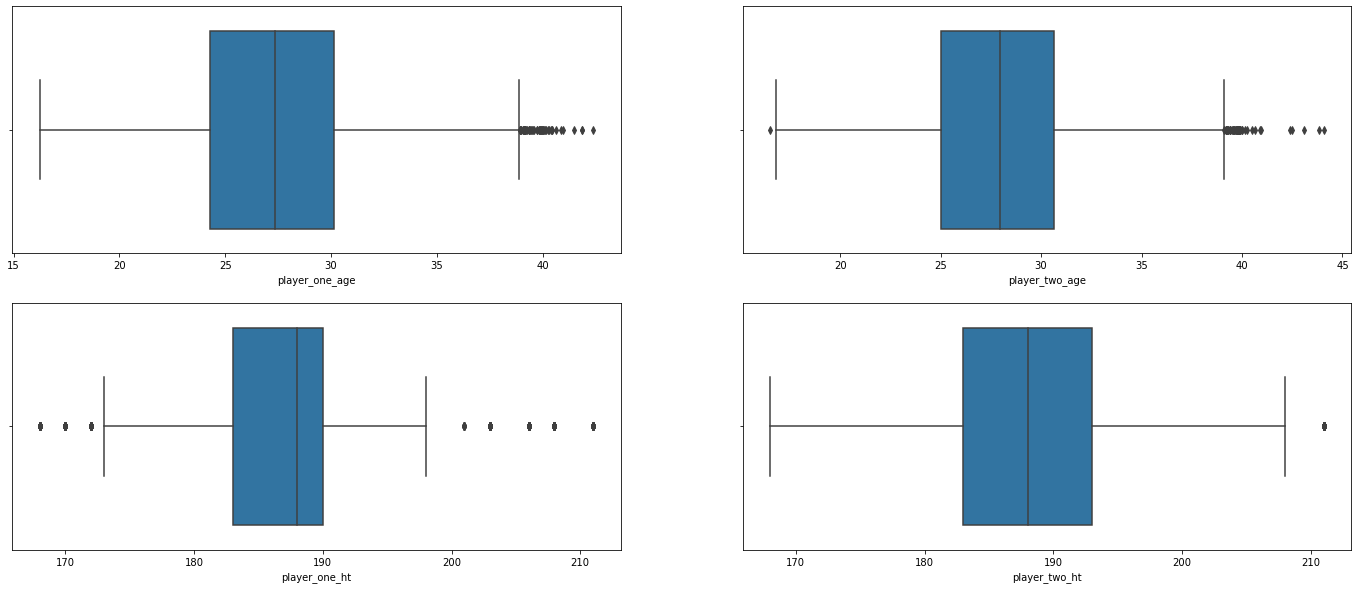

In [17]:
figbi, axesbi = plt.subplots(2, 2, figsize=(24, 10))
sns.boxplot(x="player_one_age", data=data, ax=axesbi[0, 0])
sns.boxplot(x="player_two_age", data=data, ax=axesbi[0, 1])
sns.boxplot(x="player_one_ht", data=data, ax=axesbi[1, 0])
sns.boxplot(x="player_two_ht", data=data, ax=axesbi[1, 1])



<AxesSubplot:ylabel='player_two_break_point_faced'>

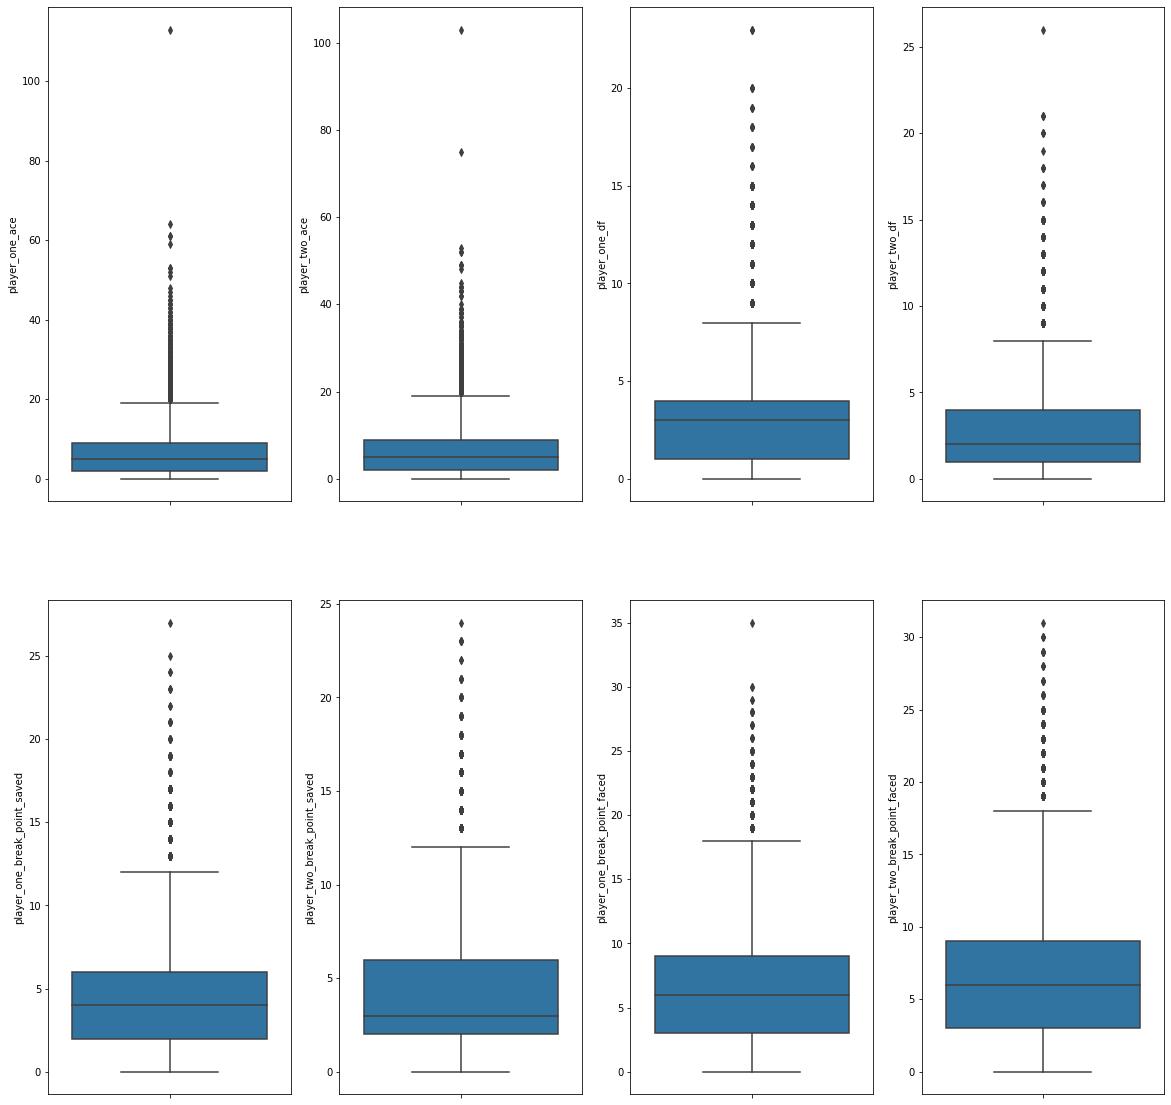

In [18]:
figbi, axesbi = plt.subplots(2, 4, figsize=(20, 20))
sns.boxplot(y="player_one_ace", data=data, orient="v", ax=axesbi[0, 0])
sns.boxplot(y="player_two_ace", data=data, orient="v", ax=axesbi[0, 1])
sns.boxplot(y="player_one_df", data=data, orient="v", ax=axesbi[0, 2])
sns.boxplot(y="player_two_df", data=data, orient="v", ax=axesbi[0, 3])
sns.boxplot(y="player_one_break_point_saved", data=data, orient="v", ax=axesbi[1, 0])
sns.boxplot(y="player_two_break_point_saved", data=data, orient="v", ax=axesbi[1, 1])
sns.boxplot(y="player_one_break_point_faced", data=data, orient="v", ax=axesbi[1, 2])
sns.boxplot(y="player_two_break_point_faced", data=data, orient="v", ax=axesbi[1, 3])


In [19]:
# Dropping the outlier data points
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

outlier_count = 0
for col in ["player_one_age", "player_two_age"]:
    new_df = remove_outlier(data, col)
    outlier_count += data.shape[0] - new_df.shape[0]

print(f"Number of outliers to be removed: {outlier_count}")


Number of outliers to be removed: 107


In [20]:
def replace_with_max_min_limit(dataframe, variable):
    low_limit, up_limit = outlier(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

print(remove_outlier(data, "player_one_age").shape)
print(replace_with_max_min_limit(data, "player_one_age"))
print(remove_outlier(data, "player_two_age").shape)
print(replace_with_max_min_limit(data, "player_two_age"))

(28385, 25)
None
(28382, 25)
None


In [21]:
for col in num_cols:
    remove_outlier(data, col).shape
    replace_with_max_min_limit(data, col)


<AxesSubplot:xlabel='player_two_ht'>

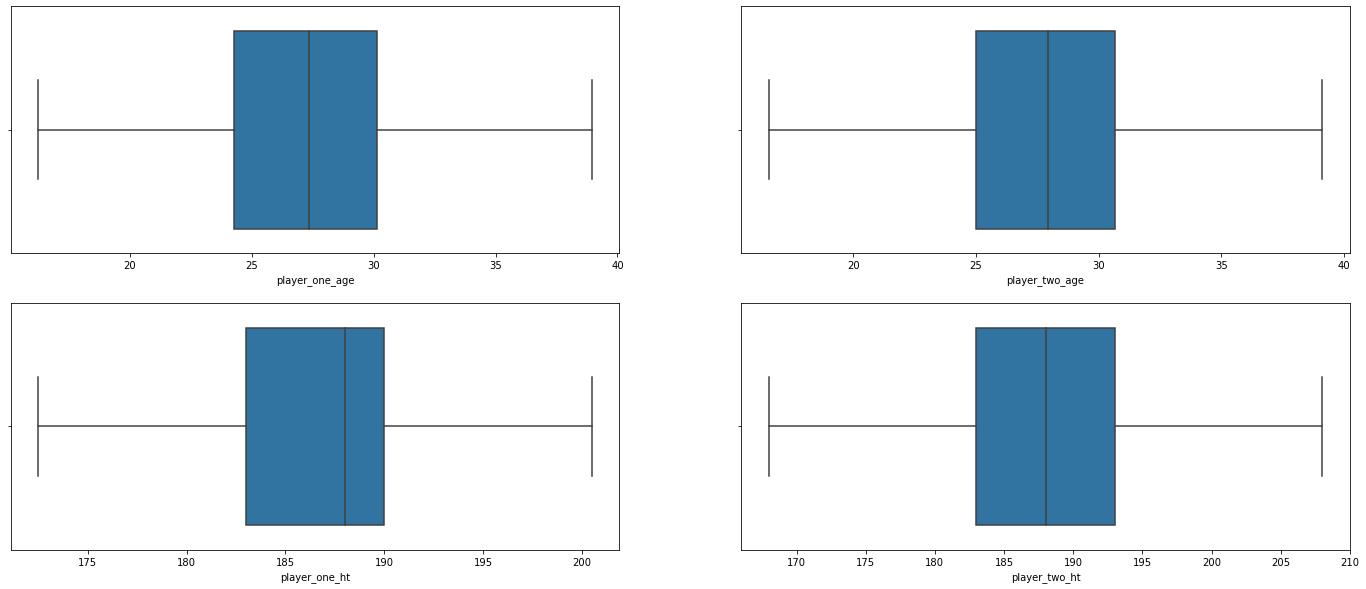

In [22]:
figbi, axesbi = plt.subplots(2, 2, figsize=(24, 10))
sns.boxplot(x="player_one_age", data=data, ax=axesbi[0, 0])
sns.boxplot(x="player_two_age", data=data, ax=axesbi[0, 1])
sns.boxplot(x="player_one_ht", data=data, ax=axesbi[1, 0])
sns.boxplot(x="player_two_ht", data=data, ax=axesbi[1, 1])



<AxesSubplot:ylabel='player_two_break_point_faced'>

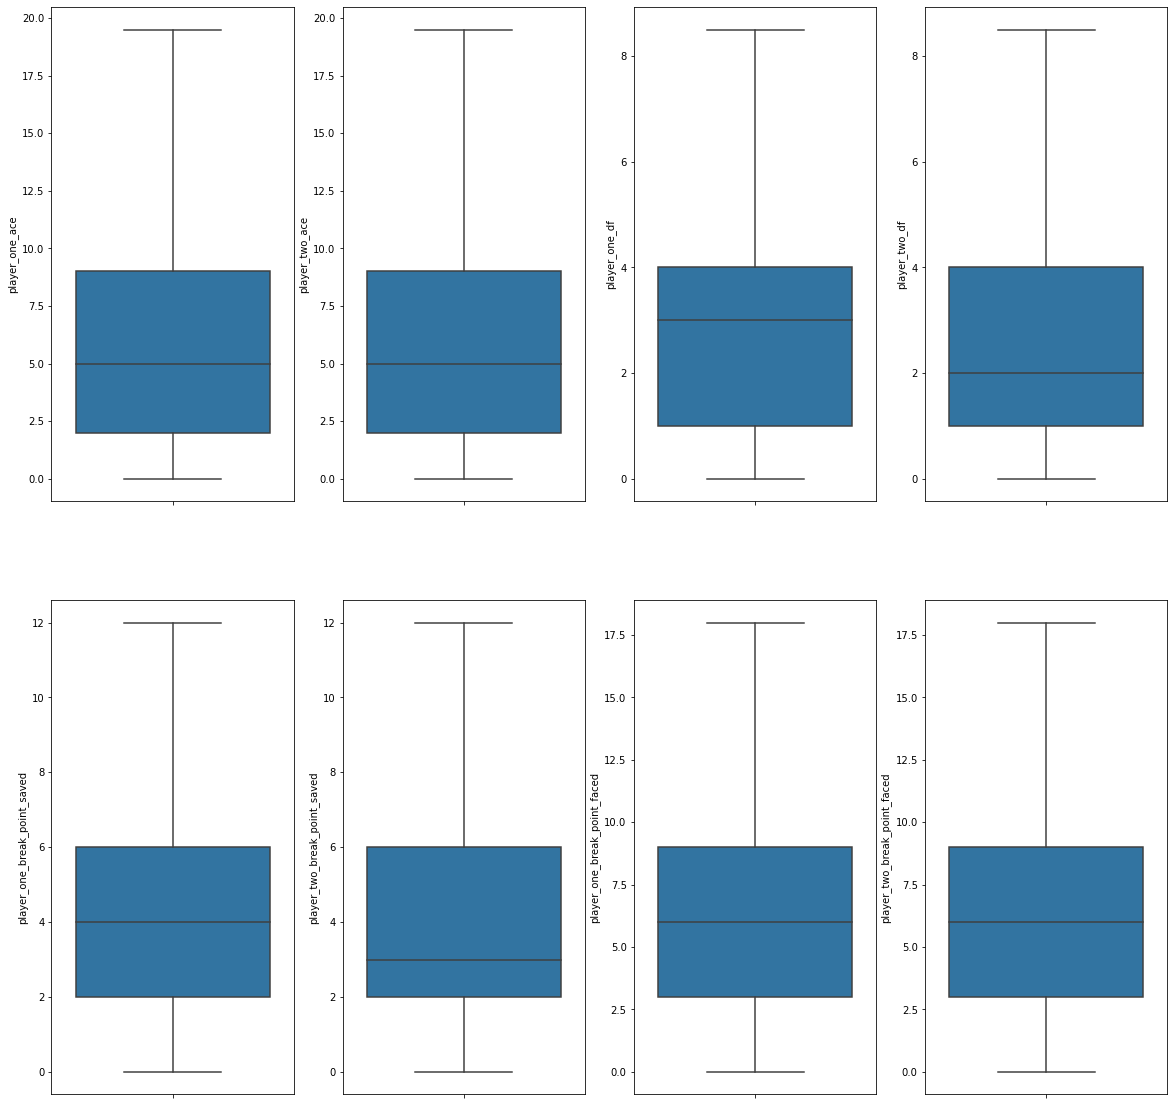

In [23]:
figbi, axesbi = plt.subplots(2, 4, figsize=(20, 20))
sns.boxplot(y="player_one_ace", data=data, orient="v", ax=axesbi[0, 0])
sns.boxplot(y="player_two_ace", data=data, orient="v", ax=axesbi[0, 1])
sns.boxplot(y="player_one_df", data=data, orient="v", ax=axesbi[0, 2])
sns.boxplot(y="player_two_df", data=data, orient="v", ax=axesbi[0, 3])
sns.boxplot(y="player_one_break_point_saved", data=data, orient="v", ax=axesbi[1, 0])
sns.boxplot(y="player_two_break_point_saved", data=data, orient="v", ax=axesbi[1, 1])
sns.boxplot(y="player_one_break_point_faced", data=data, orient="v", ax=axesbi[1, 2])
sns.boxplot(y="player_two_break_point_faced", data=data, orient="v", ax=axesbi[1, 3])


<AxesSubplot:xlabel='player_two_ht', ylabel='Count'>

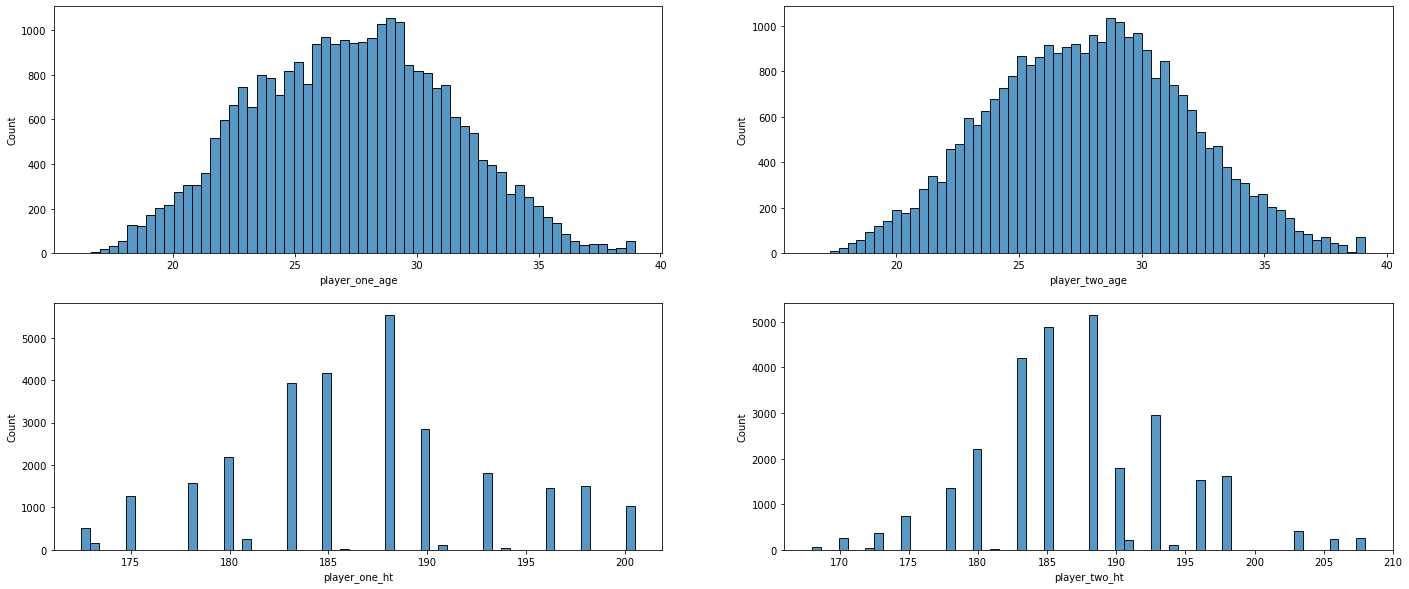

In [24]:
figbi, axesbi = plt.subplots(2, 2, figsize=(24, 10))
sns.histplot(x="player_one_age", data=data, ax=axesbi[0, 0])
sns.histplot(x="player_two_age", data=data, ax=axesbi[0, 1])
sns.histplot(x="player_one_ht", data=data, ax=axesbi[1, 0])
sns.histplot(x="player_two_ht", data=data, ax=axesbi[1, 1])



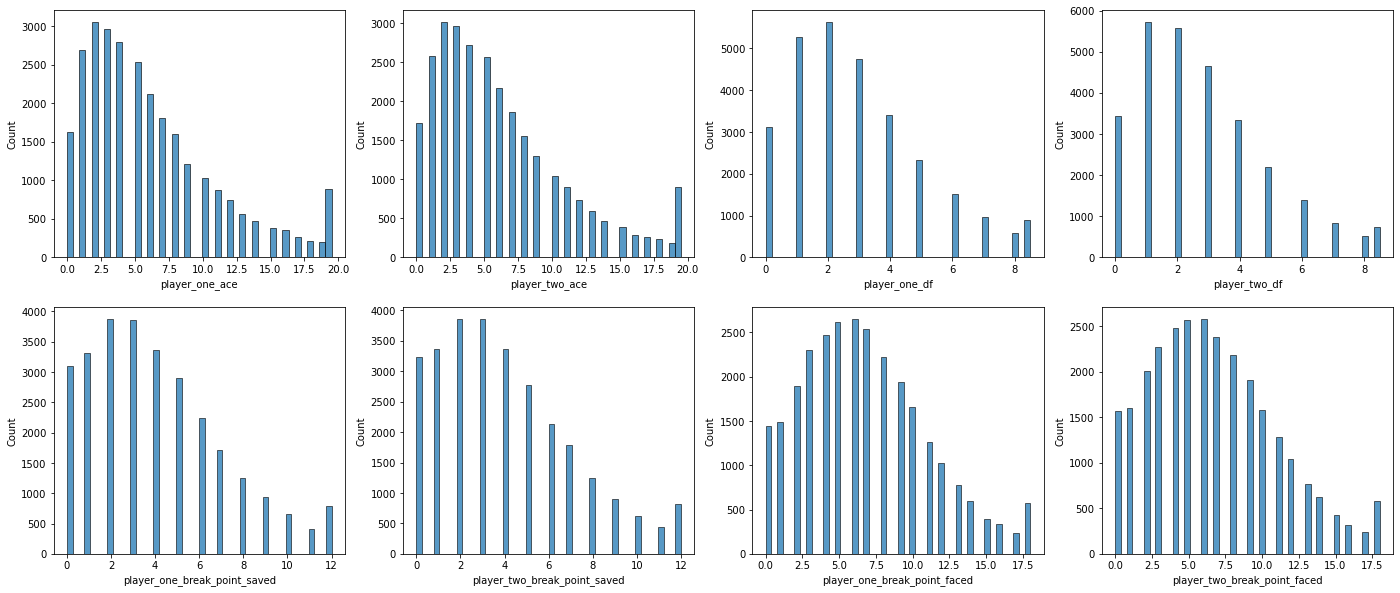

In [25]:
fig, axes = plt.subplots(2, 4, figsize=(24, 10))

# plot histograms of various tennis statistics for two players
sns.histplot(x="player_one_ace", data=data, ax=axes[0, 0])
sns.histplot(x="player_two_ace", data=data, ax=axes[0, 1])
sns.histplot(x="player_one_df", data=data, ax=axes[0, 2])
sns.histplot(x="player_two_df", data=data, ax=axes[0, 3])
sns.histplot(x="player_one_break_point_saved", data=data, ax=axes[1, 0])
sns.histplot(x="player_two_break_point_saved", data=data, ax=axes[1, 1])
sns.histplot(x="player_one_break_point_faced", data=data, ax=axes[1, 2])
sns.histplot(x="player_two_break_point_faced", data=data, ax=axes[1, 3])

# display the plot
plt.show()

In [26]:
data.to_csv("Tennis_cleaned_data.csv",index=False)

In [79]:
import glob
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [80]:
data = pd.read_csv("Tennis_cleaned_data.csv")

In [81]:
data

,surface,tourney_date,player_one,player_two,player_one_ht,player_two_ht,player_one_age,player_two_age,player_one_hand,player_two_hand,...,player_two_break_point_saved,player_one_break_point_faced,player_two_break_point_faced,player_one_rank,player_two_rank,player_one_rank_points,player_two_rank_points,FTR,player_one_win_percentage,player_two_win_percentage
0,Hard,2010-01-03,Andy Roddick,Peter Luczak,188.0,183.0,27.348392,30.346338,R,R,...,3.0,3.0,5.0,7.0,77.0,3126.0,598.0,W,85.714286,85.294118
1,Hard,2010-01-03,Carsten Ball,Mischa Zverev,198.0,190.0,22.543463,22.370979,L,L,...,7.0,0.0,10.0,134.0,78.0,400.0,590.0,W,76.666667,64.705882
2,Hard,2010-01-03,Jarkko Nieminen,Richard Gasquet,185.0,185.0,28.451745,23.548255,L,R,...,5.0,11.0,8.0,88.0,52.0,568.0,850.0,L,65.517241,64.705882
3,Hard,2010-01-03,Jurgen Melzer,Matthew Ebden,183.0,188.0,28.621492,22.108145,L,R,...,3.0,5.0,3.0,28.0,181.0,1260.0,151.0,L,55.172414,85.714286
4,Hard,2010-01-03,Nick Lindahl,Tomas Berdych,183.0,196.0,21.429158,24.298426,R,R,...,1.0,9.0,1.0,170.5,20.0,179.0,1655.0,L,63.414634,88.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28432,Hard,2022-03-04,Casper Ruud,Mikhail Kukushkin,183.0,183.0,23.186858,34.176591,R,R,...,2.0,1.0,5.0,8.0,160.0,3126.0,386.0,W,77.419355,58.823529
28433,Hard,2022-03-04,Alexander Bublik,Viktor Durasovic,196.0,185.0,24.700890,24.947296,R,R,...,1.0,0.0,4.0,32.0,181.0,1416.0,143.0,W,98.469388,78.260870
28434,Hard,2022-03-04,Alexander Bublik,Casper Ruud,196.0,183.0,24.700890,23.186858,R,R,...,2.0,5.0,4.0,32.0,8.0,1416.0,3323.0,W,86.206897,76.470588
28435,Hard,2022-03-04,Elias Ymer,Taro Daniel,183.0,191.0,25.886379,29.086927,R,R,...,5.0,10.0,8.0,133.0,101.0,496.0,660.0,W,76.000000,70.270270


In [82]:
data = data.dropna()

In [83]:
data

,surface,tourney_date,player_one,player_two,player_one_ht,player_two_ht,player_one_age,player_two_age,player_one_hand,player_two_hand,...,player_two_break_point_saved,player_one_break_point_faced,player_two_break_point_faced,player_one_rank,player_two_rank,player_one_rank_points,player_two_rank_points,FTR,player_one_win_percentage,player_two_win_percentage
0,Hard,2010-01-03,Andy Roddick,Peter Luczak,188.0,183.0,27.348392,30.346338,R,R,...,3.0,3.0,5.0,7.0,77.0,3126.0,598.0,W,85.714286,85.294118
1,Hard,2010-01-03,Carsten Ball,Mischa Zverev,198.0,190.0,22.543463,22.370979,L,L,...,7.0,0.0,10.0,134.0,78.0,400.0,590.0,W,76.666667,64.705882
2,Hard,2010-01-03,Jarkko Nieminen,Richard Gasquet,185.0,185.0,28.451745,23.548255,L,R,...,5.0,11.0,8.0,88.0,52.0,568.0,850.0,L,65.517241,64.705882
3,Hard,2010-01-03,Jurgen Melzer,Matthew Ebden,183.0,188.0,28.621492,22.108145,L,R,...,3.0,5.0,3.0,28.0,181.0,1260.0,151.0,L,55.172414,85.714286
4,Hard,2010-01-03,Nick Lindahl,Tomas Berdych,183.0,196.0,21.429158,24.298426,R,R,...,1.0,9.0,1.0,170.5,20.0,179.0,1655.0,L,63.414634,88.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28432,Hard,2022-03-04,Casper Ruud,Mikhail Kukushkin,183.0,183.0,23.186858,34.176591,R,R,...,2.0,1.0,5.0,8.0,160.0,3126.0,386.0,W,77.419355,58.823529
28433,Hard,2022-03-04,Alexander Bublik,Viktor Durasovic,196.0,185.0,24.700890,24.947296,R,R,...,1.0,0.0,4.0,32.0,181.0,1416.0,143.0,W,98.469388,78.260870
28434,Hard,2022-03-04,Alexander Bublik,Casper Ruud,196.0,183.0,24.700890,23.186858,R,R,...,2.0,5.0,4.0,32.0,8.0,1416.0,3323.0,W,86.206897,76.470588
28435,Hard,2022-03-04,Elias Ymer,Taro Daniel,183.0,191.0,25.886379,29.086927,R,R,...,5.0,10.0,8.0,133.0,101.0,496.0,660.0,W,76.000000,70.270270


In [84]:
data.isna().sum()

surface                         0
tourney_date                    0
player_one                      0
player_two                      0
player_one_ht                   0
player_two_ht                   0
player_one_age                  0
player_two_age                  0
player_one_hand                 0
player_two_hand                 0
player_one_ace                  0
player_two_ace                  0
player_one_df                   0
player_two_df                   0
player_one_break_point_saved    0
player_two_break_point_saved    0
player_one_break_point_faced    0
player_two_break_point_faced    0
player_one_rank                 0
player_two_rank                 0
player_one_rank_points          0
player_two_rank_points          0
FTR                             0
player_one_win_percentage       0
player_two_win_percentage       0
dtype: int64

In [85]:
data.dtypes

surface                          object
tourney_date                     object
player_one                       object
player_two                       object
player_one_ht                   float64
player_two_ht                   float64
player_one_age                  float64
player_two_age                  float64
player_one_hand                  object
player_two_hand                  object
player_one_ace                  float64
player_two_ace                  float64
player_one_df                   float64
player_two_df                   float64
player_one_break_point_saved    float64
player_two_break_point_saved    float64
player_one_break_point_faced    float64
player_two_break_point_faced    float64
player_one_rank                 float64
player_two_rank                 float64
player_one_rank_points          float64
player_two_rank_points          float64
FTR                              object
player_one_win_percentage       float64
player_two_win_percentage       float64


In [86]:
df = data.copy()

In [87]:
from sklearn import preprocessing
df["surface"] = preprocessing.LabelEncoder.fit_transform(df,df["surface"])
df["player_one_hand"] = preprocessing.LabelEncoder.fit_transform(df,df["player_one_hand"])
df["player_two_hand"] = preprocessing.LabelEncoder.fit_transform(df,df["player_two_hand"])

In [88]:
df.dtypes

surface                           int32
tourney_date                     object
player_one                       object
player_two                       object
player_one_ht                   float64
player_two_ht                   float64
player_one_age                  float64
player_two_age                  float64
player_one_hand                   int32
player_two_hand                   int32
player_one_ace                  float64
player_two_ace                  float64
player_one_df                   float64
player_two_df                   float64
player_one_break_point_saved    float64
player_two_break_point_saved    float64
player_one_break_point_faced    float64
player_two_break_point_faced    float64
player_one_rank                 float64
player_two_rank                 float64
player_one_rank_points          float64
player_two_rank_points          float64
FTR                              object
player_one_win_percentage       float64
player_two_win_percentage       float64


In [90]:
import numpy as np
df["surface"] = np.int64(df["surface"])

In [91]:
df["player_one_hand"] = np.int64(df["player_one_hand"])

In [92]:
df["player_two_hand"] = np.int64(df["player_two_hand"])

In [93]:
df.columns

Index(['surface', 'tourney_date', 'player_one', 'player_two', 'player_one_ht',
       'player_two_ht', 'player_one_age', 'player_two_age', 'player_one_hand',
       'player_two_hand', 'player_one_ace', 'player_two_ace', 'player_one_df',
       'player_two_df', 'player_one_break_point_saved',
       'player_two_break_point_saved', 'player_one_break_point_faced',
       'player_two_break_point_faced', 'player_one_rank', 'player_two_rank',
       'player_one_rank_points', 'player_two_rank_points', 'FTR',
       'player_one_win_percentage', 'player_two_win_percentage'],
      dtype='object')

In [94]:
X = df.drop(["tourney_date","FTR","player_one","player_two"],1)
y = df["FTR"]

In [95]:
X

,surface,player_one_ht,player_two_ht,player_one_age,player_two_age,player_one_hand,player_two_hand,player_one_ace,player_two_ace,player_one_df,...,player_one_break_point_saved,player_two_break_point_saved,player_one_break_point_faced,player_two_break_point_faced,player_one_rank,player_two_rank,player_one_rank_points,player_two_rank_points,player_one_win_percentage,player_two_win_percentage
0,3,188.0,183.0,27.348392,30.346338,1,1,15.0,4.0,0.0,...,3.0,3.0,3.0,5.0,7.0,77.0,3126.0,598.0,85.714286,85.294118
1,3,198.0,190.0,22.543463,22.370979,0,0,10.0,2.0,3.0,...,0.0,7.0,0.0,10.0,134.0,78.0,400.0,590.0,76.666667,64.705882
2,3,185.0,185.0,28.451745,23.548255,0,1,4.0,5.0,0.0,...,7.0,5.0,11.0,8.0,88.0,52.0,568.0,850.0,65.517241,64.705882
3,3,183.0,188.0,28.621492,22.108145,0,1,2.0,12.0,1.0,...,2.0,3.0,5.0,3.0,28.0,181.0,1260.0,151.0,55.172414,85.714286
4,3,183.0,196.0,21.429158,24.298426,1,1,6.0,3.0,1.0,...,6.0,1.0,9.0,1.0,170.5,20.0,179.0,1655.0,63.414634,88.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28432,3,183.0,183.0,23.186858,34.176591,1,1,10.0,2.0,1.0,...,1.0,2.0,1.0,5.0,8.0,160.0,3126.0,386.0,77.419355,58.823529
28433,3,196.0,185.0,24.700890,24.947296,1,1,13.0,2.0,0.0,...,0.0,1.0,0.0,4.0,32.0,181.0,1416.0,143.0,98.469388,78.260870
28434,3,196.0,183.0,24.700890,23.186858,1,1,14.0,9.0,6.0,...,4.0,2.0,5.0,4.0,32.0,8.0,1416.0,3323.0,86.206897,76.470588
28435,3,183.0,191.0,25.886379,29.086927,1,1,7.0,2.0,5.0,...,9.0,5.0,10.0,8.0,133.0,101.0,496.0,660.0,76.000000,70.270270


In [96]:
import xgboost
from xgboost import XGBClassifier
xgb_model= XGBClassifier(colsample_bytree = 0.749816047538945, gamma = 0.9507143064099162, learning_rate = 0.0831993941811405, max_depth = 7, min_child_weight = 5, n_estimators = 152, reg_alpha = 0.44583275285359114, reg_lambda = 0.09997491581800289, subsample = 0.7836995567863468,use_label_encoder=True)
xgb_model.fit(X, y)
y_pred = xgb_model.predict(X)
predictions = [value for value in y_pred]
accuracy = accuracy_score(y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[00:51:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 96.40%


In [97]:
from sklearn.metrics import classification_report


In [98]:
print(classification_report(y,predictions))

              precision    recall  f1-score   support

           L       0.96      0.97      0.96     14332
           W       0.96      0.96      0.96     14098

    accuracy                           0.96     28430
   macro avg       0.96      0.96      0.96     28430
weighted avg       0.96      0.96      0.96     28430



In [99]:
y_pred_pred = xgb_model.predict_proba(X)

In [100]:
data["Lose_prob"] =y_pred_pred[:,0] * 100

In [101]:
data["win_prob"] = y_pred_pred[:,1] * 100

In [103]:
data["predictions"] = predictions

In [104]:
data

,surface,tourney_date,player_one,player_two,player_one_ht,player_two_ht,player_one_age,player_two_age,player_one_hand,player_two_hand,...,player_one_rank,player_two_rank,player_one_rank_points,player_two_rank_points,FTR,player_one_win_percentage,player_two_win_percentage,Lose_prob,win_prob,predictions
0,Hard,2010-01-03,Andy Roddick,Peter Luczak,188.0,183.0,27.348392,30.346338,R,R,...,7.0,77.0,3126.0,598.0,W,85.714286,85.294118,1.640415,98.359589,W
1,Hard,2010-01-03,Carsten Ball,Mischa Zverev,198.0,190.0,22.543463,22.370979,L,L,...,134.0,78.0,400.0,590.0,W,76.666667,64.705882,0.828624,99.171379,W
2,Hard,2010-01-03,Jarkko Nieminen,Richard Gasquet,185.0,185.0,28.451745,23.548255,L,R,...,88.0,52.0,568.0,850.0,L,65.517241,64.705882,67.947701,32.052303,L
3,Hard,2010-01-03,Jurgen Melzer,Matthew Ebden,183.0,188.0,28.621492,22.108145,L,R,...,28.0,181.0,1260.0,151.0,L,55.172414,85.714286,99.903206,0.096792,L
4,Hard,2010-01-03,Nick Lindahl,Tomas Berdych,183.0,196.0,21.429158,24.298426,R,R,...,170.5,20.0,179.0,1655.0,L,63.414634,88.888889,99.838661,0.161337,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28432,Hard,2022-03-04,Casper Ruud,Mikhail Kukushkin,183.0,183.0,23.186858,34.176591,R,R,...,8.0,160.0,3126.0,386.0,W,77.419355,58.823529,0.092340,99.907661,W
28433,Hard,2022-03-04,Alexander Bublik,Viktor Durasovic,196.0,185.0,24.700890,24.947296,R,R,...,32.0,181.0,1416.0,143.0,W,98.469388,78.260870,0.433290,99.566711,W
28434,Hard,2022-03-04,Alexander Bublik,Casper Ruud,196.0,183.0,24.700890,23.186858,R,R,...,32.0,8.0,1416.0,3323.0,W,86.206897,76.470588,13.778597,86.221405,W
28435,Hard,2022-03-04,Elias Ymer,Taro Daniel,183.0,191.0,25.886379,29.086927,R,R,...,133.0,101.0,496.0,660.0,W,76.000000,70.270270,5.604172,94.395828,W


In [105]:
import pickle
file_name = "xgb_tennis_model.pkl"

# save
pickle.dump(xgb_model, open(file_name, "wb"))

In [107]:
df.dtypes

surface                           int64
tourney_date                     object
player_one                       object
player_two                       object
player_one_ht                   float64
player_two_ht                   float64
player_one_age                  float64
player_two_age                  float64
player_one_hand                   int64
player_two_hand                   int64
player_one_ace                  float64
player_two_ace                  float64
player_one_df                   float64
player_two_df                   float64
player_one_break_point_saved    float64
player_two_break_point_saved    float64
player_one_break_point_faced    float64
player_two_break_point_faced    float64
player_one_rank                 float64
player_two_rank                 float64
player_one_rank_points          float64
player_two_rank_points          float64
FTR                              object
player_one_win_percentage       float64
player_two_win_percentage       float64
